<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
boston_df.shape

(506, 14)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 2: Generating descriptive statistics and Visualizations


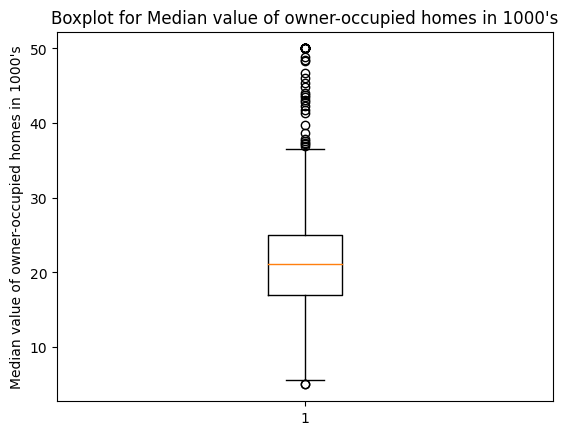

In [7]:
# For the "Median value of owner-occupied homes in 1000's" provide a boxplot
pyplot.boxplot(boston_df["MEDV"])
pyplot.ylabel("Median value of owner-occupied homes in 1000's")
pyplot.title("Boxplot for Median value of owner-occupied homes in 1000's")
pyplot.show()

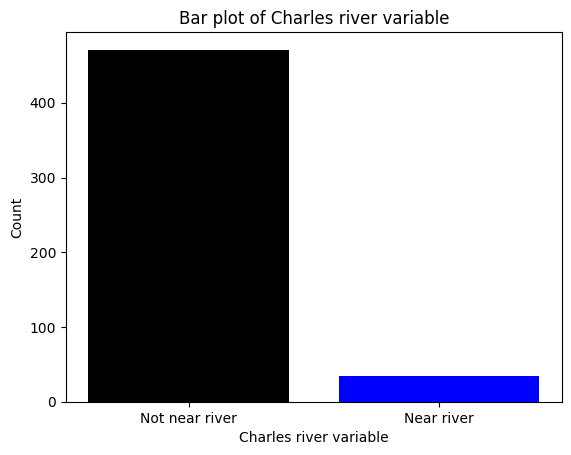

In [8]:
# Provide a  bar plot for the Charles river variable
chas_counts = boston_df['CHAS'].value_counts()
pyplot.bar(chas_counts.index, chas_counts.values, color = ['black','blue'])
pyplot.xlabel("Charles river variable")
pyplot.ylabel("Count")
pyplot.title("Bar plot of Charles river variable")
pyplot.xticks(chas_counts.index,labels=["Not near river", "Near river"])
pyplot.show()


[Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable')]

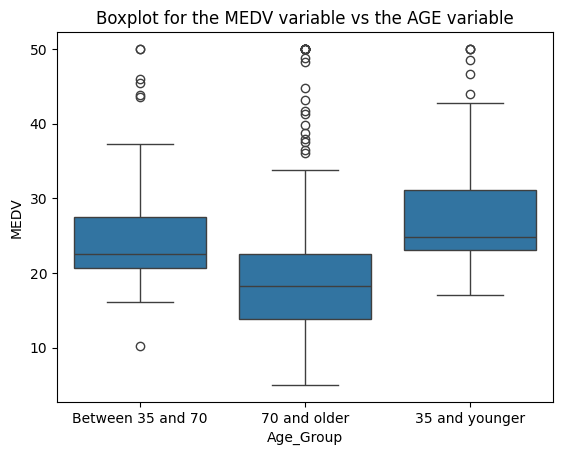

In [9]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[boston_df['AGE'] <=35, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] >35) & (boston_df['AGE']<70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[boston_df['AGE'] >=70, 'Age_Group'] = "70 and older"

box = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
box.set(title = "Boxplot for the MEDV variable vs the AGE variable")


[Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0, 0.5, 'Nitric oxide concentrations'),
 Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')]

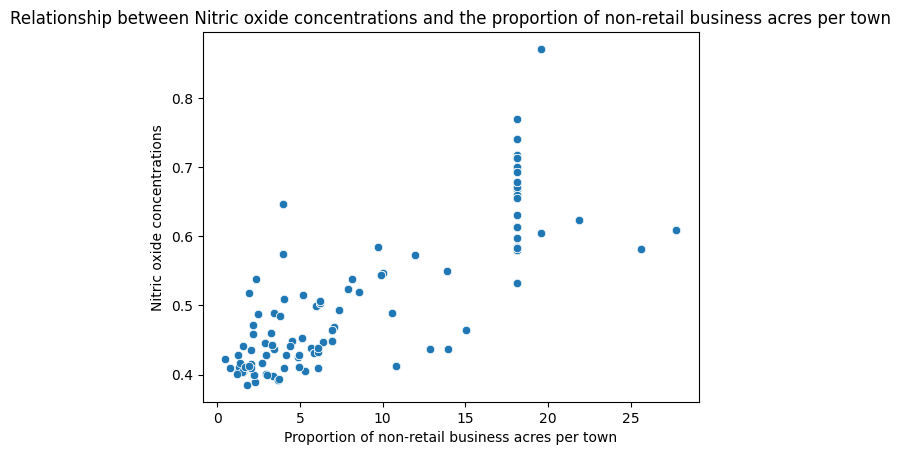

In [10]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
scatter = sns.scatterplot(x = 'INDUS', y = 'NOX',data = boston_df)
scatter.set(xlabel= 'Proportion of non-retail business acres per town', ylabel='Nitric oxide concentrations', 
            title = 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

There is a positive correlation between Nitric oxide concentration and Proportion of non-retail business acres per town. There is a linear relationship between both of them

<ipython-input-11-0d64213d893e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist = sns.distplot(boston_df['PTRATIO'])


[Text(0.5, 0, 'Pupil to teacher ratio'),
 Text(0, 0.5, 'Frequency of pupil to teacher ration'),
 Text(0.5, 1.0, 'Histogram of pupil to teacher ratio')]

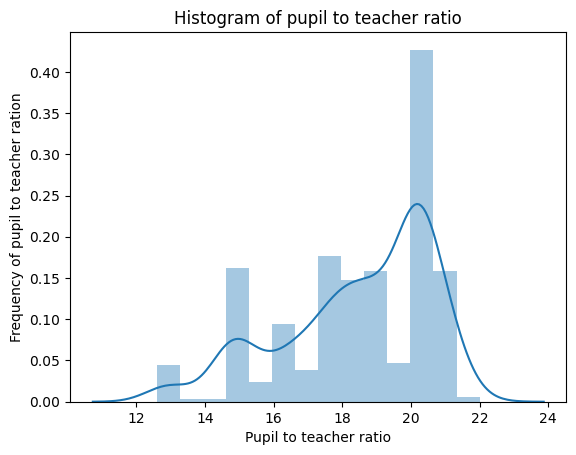

In [11]:
# Create a histogram for the pupil to teacher ratio variable
hist = sns.distplot(boston_df['PTRATIO'])
hist.set(xlabel = 'Pupil to teacher ratio',
         ylabel = 'Frequency of pupil to teacher ration',
         title = 'Histogram of pupil to teacher ratio')

### Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

1. State your hypothesis.

2. Use α = 0.05

3. Perform the test Statistics.

4. State the conclusion from the test.




**1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

To test whether there is a significant difference in median value of houses bounded by the Charles river or not, we can use T-test for independent samples)

- Null hypothesis$(H_0)$ - There is no significant difference in median value of houses bounded by the Charles river or not ($\mu1 = \mu2$)
- Alternative hypothesis$H_a$ - There is significant difference in median values ($\mu1 \neq \mu2$)

In [12]:
t_stat, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]["MEDV"], boston_df[boston_df['CHAS'] == 0]["MEDV"])
print("P-value", p_value)
                        

P-value 7.390623170519905e-05


With p-value less than 0.005, we reject the null hypothesis. This suggest there is a significant difference in median values. 

**2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

To test whether there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) we use ANOVA test, which is suitable for comparing mean across multiple groups. 

- Null hypothesis$H_0$ - There is no siginificant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)($\mu1 = \mu2$)
- Alternative hypothesis$H_a$ - There is significant difference in median($\mu1 \neq \mu2$)

In [18]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV'],
                          boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'],
                          boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'])
                          
print("P_value", p_value)                          

P_value 1.7105011022702984e-15


P-value is smaller than 0.005. We reject null-hypothesis, that indicates there is a significant difference in median values of houses. The variable "AGE' is associated with the difference in median values.

**3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

To determine if there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town we can use pearson correlation. The pearson correlation coefficient measures the linear relationship between the continuous variables.


In [21]:
from scipy.stats import pearsonr

pearson_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson coefficient", pearson_coeff)
print("P-value", p_value)

Pearson coefficient 0.7636514469209192
P-value 7.913361061210442e-98


Because of pearson coeffcient 0.76 and smaller p-value, indicates there is no relationship between Nitric oxide concentration and proportion of non-retail business acres per town.

**4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

The impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes can be found using regression analysis. Regression analysis is used for find the relationship between the dependent variables

(506, 1)
(506,)
Coefficient of determination: 0.062464372121782796

intercept:18.39008833049338

slope: 1.0916130158411106



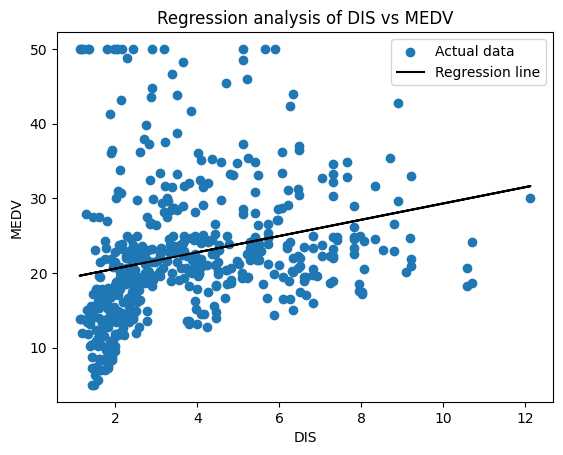

In [57]:
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np

X = boston_df[['DIS']] #independent variable
y = boston_df['MEDV'] #dependent variable

print(X.shape)
print(y.shape)

#Create model
model = LinearRegression()
model.fit(X,y)

r_sq = model.score(X,y)
print(f"Coefficient of determination: {r_sq}\n")

print(f"intercept:{model.intercept_}\n")
print(f"slope: {model.coef_[0]}\n")
y_pred = model.predict(X)

#plot regression
pyplot.scatter(X,y,label = "Actual data")
pyplot.plot(X,model.predict(X), color = 'black',label = "Regression line")
pyplot.title("Regression analysis of DIS vs MEDV")
pyplot.xlabel("DIS")
pyplot.ylabel("MEDV")
pyplot.legend()
pyplot.show()
